In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Reading csv file into DataFrame usign pandas
df = pd.read_csv('output/merged_data_labeled.csv', dtype={'id': str})

# printing first five records
print(df.head())

      X     Y     Z       EDA     HR   TEMP  id  \
0 -13.0 -61.0   5.0  6.769995  99.43  31.17  15   
1 -20.0 -69.0  -3.0  6.769995  99.43  31.17  15   
2 -31.0 -78.0 -15.0  6.769995  99.43  31.17  15   
3 -47.0 -65.0 -38.0  6.769995  99.43  31.17  15   
4 -67.0 -57.0 -53.0  6.769995  99.43  31.17  15   

                        datetime  label  
0  2020-07-08 14:03:00.000000000    2.0  
1  2020-07-08 14:03:00.031249920    2.0  
2  2020-07-08 14:03:00.062500096    2.0  
3  2020-07-08 14:03:00.093750016    2.0  
4  2020-07-08 14:03:00.124999936    2.0  


In [29]:
# This line of code prints the data type of each column in the DataFrame
print(df.dtypes)

# These lines of code print the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

X           float64
Y           float64
Z           float64
EDA         float64
HR          float64
TEMP        float64
id           object
datetime     object
label       float64
dtype: object
Number of rows: 11509051
Number of columns: 9


In [31]:
# Calculate Q1 and Q3 for column X
Q1 = df['X'].quantile(0.25)
Q3 = df['X'].quantile(0.75)

# Calculate Q1 and Q3 for column Y
Q4 = df['Y'].quantile(0.25)
Q5 = df['Y'].quantile(0.75)

# Calculate Q1 and Q3 for column Z
Q6 = df['Z'].quantile(0.75)
Q7 = df['Z'].quantile(0.75)

# Calculate IQR for each column
IQR_X = Q3 - Q1
IQR_Y = Q5 - Q4
IQR_Z = Q7 - Q6

# Define upper and lower bounds for each column
upper_bound_x = Q3 + 1.5 * IQR_X
lower_bound_x = Q1 - 1.5 * IQR_X

upper_bound_y = Q5 + 1.5 * IQR_Y
lower_bound_y = Q4 - 1.5 * IQR_Y

upper_bound_z = Q7 + 1.5 * IQR_Z
lower_bound_z = Q6 - 1.5 * IQR_Z

# Filter out outliers using the bounds
df = df[(df['X'] >= lower_bound_x) & (df['X'] <= upper_bound_x)]
df = df[(df['Y'] >= lower_bound_y) & (df['Y'] <= upper_bound_y)]
df = df[(df['Z'] >= lower_bound_z) & (df['Z'] <= upper_bound_z)]

# Print the head of the DataFrame to check the result
print(df.head())


        X     Y     Z       EDA      HR   TEMP  id  \
58  -51.0 -20.0  49.0  6.781528   99.72  31.21  15   
100 -38.0   8.0  49.0  6.371453  100.32  31.21  15   
116 -43.0  -2.0  49.0  6.802032  100.32  31.21  15   
135 -27.0   9.0  49.0  6.827662  100.62  31.19  15   
149 -37.0  -1.0  49.0  6.575209  100.62  31.19  15   

                          datetime  label  
58   2020-07-08 14:03:01.812499968    2.0  
100  2020-07-08 14:03:03.124999936    2.0  
116  2020-07-08 14:03:03.624999936    2.0  
135  2020-07-08 14:03:04.218749952    2.0  
149  2020-07-08 14:03:04.656250112    2.0  


In [33]:
# Drop any rows with NaN values
df = df.dropna()

# Filter out any rows where the value in the "label" column is greater than 3
df = df[df['label'] <= 3]

# Get the number of rows and columns in the resulting DataFrame
num_rows, num_cols = df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 138838
Number of columns: 9


In [34]:
# convert "datetime" column in the DataFrame df to a datetime data type 
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

#Confirming the data types of each columns
print(df.dtypes)

#Verifying all new dataset with respect to data
print(df.head())

X                  float64
Y                  float64
Z                  float64
EDA                float64
HR                 float64
TEMP               float64
id                  object
datetime    datetime64[ns]
label              float64
dtype: object
        X     Y     Z       EDA      HR   TEMP  id  \
58  -51.0 -20.0  49.0  6.781528   99.72  31.21  15   
100 -38.0   8.0  49.0  6.371453  100.32  31.21  15   
116 -43.0  -2.0  49.0  6.802032  100.32  31.21  15   
135 -27.0   9.0  49.0  6.827662  100.62  31.19  15   
149 -37.0  -1.0  49.0  6.575209  100.62  31.19  15   

                         datetime  label  
58  2020-07-08 14:03:01.812499968    2.0  
100 2020-07-08 14:03:03.124999936    2.0  
116 2020-07-08 14:03:03.624999936    2.0  
135 2020-07-08 14:03:04.218749952    2.0  
149 2020-07-08 14:03:04.656250112    2.0  


In [6]:
# Rename the columns of dataframe
df = df.rename(columns={'X': 'Acc_X', 'Y': 'Acc_Y', 'Z': 'Acc_Z', 'EDA': 'EDA_Level', 'TEMP': 'Skin_Temperature', 'HR': 'Heart_Rate', 'label': 'Stress_Level'})
print(df.head())

df.to_csv('cleaned_dataset.csv')

       Acc_X  Acc_Y  Acc_Z  EDA_Level  Heart_Rate  Skin_Temperature  id  \
34      17.0  -23.0    4.0   6.854573       99.72             31.21  15   
6780    17.0  -71.0   -1.0   5.569288       80.73             31.53  15   
11191   17.0   66.0   21.0   4.105629       94.72             31.63  15   
12356   17.0   30.0   55.0   4.172266       86.57             31.73  15   
12518   17.0   35.0   57.0   4.295289       85.00             31.63  15   

                           datetime  Stress_Level  
34    2020-07-08 14:03:01.062500096           2.0  
6780  2020-07-08 14:06:31.875000064           2.0  
11191 2020-07-08 14:08:49.718749952           2.0  
12356 2020-07-08 14:09:26.124999936           2.0  
12518 2020-07-08 14:09:31.187500032           2.0  


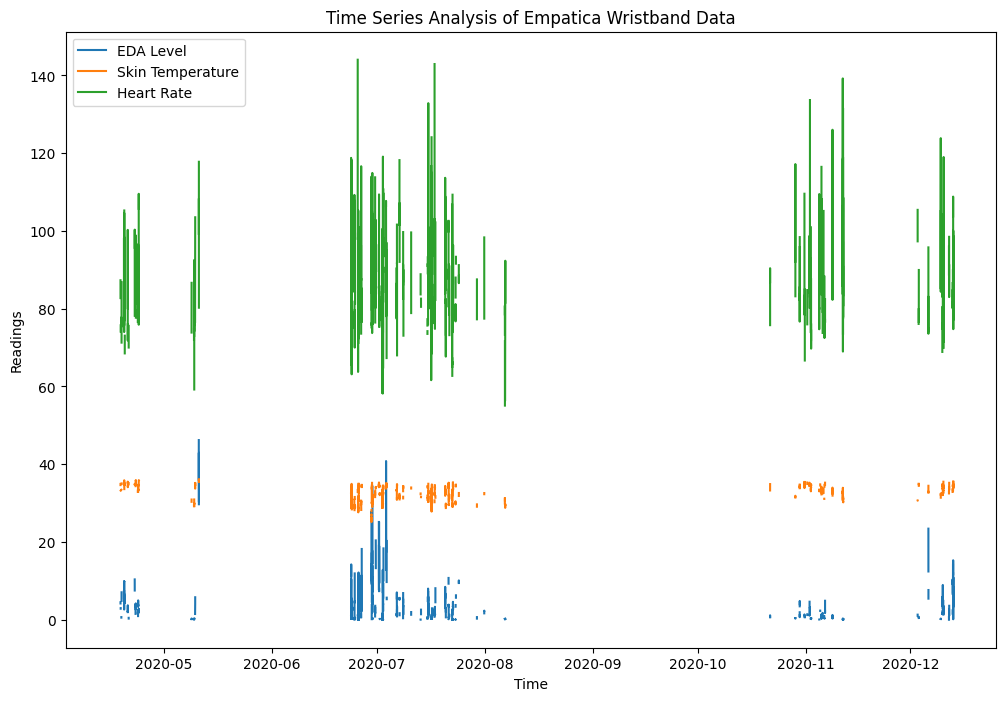

In [35]:
# Read the cleaned dataset CSV file into a Pandas DataFrame with datetime column set as index and parsed as datetime datatype
# The 'id' column is also set to string datatype
df = pd.read_csv('cleaned_dataset.csv', index_col='datetime', parse_dates=['datetime'], dtype={'id': str})

# Resample the data into 5-minute intervals and calculate the mean of numeric columns
df_resampled = df.resample('5min').mean(numeric_only=True)

# Create a figure and axis object for the plot
fig, ax = plt.subplots(figsize=(12,8))

# Plot the resampled data for EDA level, skin temperature, and heart rate on the axis
ax.plot(df_resampled.index, df_resampled['EDA_Level'], label='EDA Level')
ax.plot(df_resampled.index, df_resampled['Skin_Temperature'], label='Skin Temperature')
ax.plot(df_resampled.index, df_resampled['Heart_Rate'], label='Heart Rate')

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Readings')
ax.set_title('Time Series Analysis of Empatica Wristband Data')

# Add legend to the plot
ax.legend()

# Show the plot
plt.show()


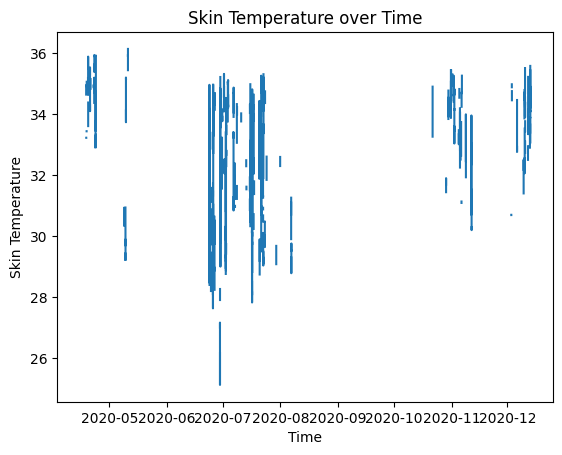

In [36]:
# Resample the data to 5 minute intervals and calculate the mean value for each interval
df_resampled = df.resample('5T').mean(numeric_only=True)

# Plot the skin temperature data over time
plt.plot(df_resampled.index, df_resampled['Skin_Temperature'])

# Set the chart title and axis labels
plt.title('Skin Temperature over Time')
plt.xlabel('Time')
plt.ylabel('Skin Temperature')

# Display the chart
plt.show()


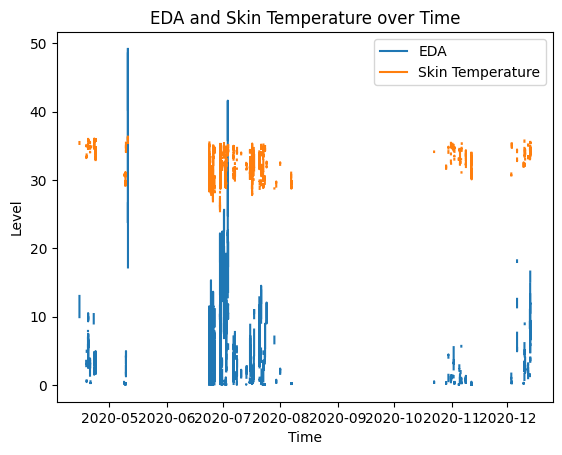

In [37]:
# Resample the data to 1 minute intervals
df_resampled = df.resample('1T').mean(numeric_only=True)

# Plot the EDA and skin temperature data over time
plt.plot(df_resampled.index, df_resampled['EDA_Level'], label='EDA')
plt.plot(df_resampled.index, df_resampled['Skin_Temperature'], label='Skin Temperature')

# Set the chart title and axis labels
plt.title('EDA and Skin Temperature over Time')
plt.xlabel('Time')
plt.ylabel('Level')

# Show the legend
plt.legend()

# Display the chart
plt.show()

In [38]:
# Split the dataset into training and test sets, to avoid overfitting
# Use 70% of data for training
train_size = int(len(df) * 0.7) 
train_df = df.iloc[:train_size, :]
test_df = df.iloc[train_size:, :]

# Print the first few rows of the training set
print('\nTraining set head:\n', train_df.head())



Training set head:
                                Unnamed: 0  Acc_X  Acc_Y  Acc_Z  EDA_Level  \
datetime                                                                    
2020-07-08 14:03:01.062500096          34   17.0  -23.0    4.0   6.854573   
2020-07-08 14:06:31.875000064        6780   17.0  -71.0   -1.0   5.569288   
2020-07-08 14:08:49.718749952       11191   17.0   66.0   21.0   4.105629   
2020-07-08 14:09:26.124999936       12356   17.0   30.0   55.0   4.172266   
2020-07-08 14:09:31.187500032       12518   17.0   35.0   57.0   4.295289   

                               Heart_Rate  Skin_Temperature  id  Stress_Level  
datetime                                                                       
2020-07-08 14:03:01.062500096       99.72             31.21  15           2.0  
2020-07-08 14:06:31.875000064       80.73             31.53  15           2.0  
2020-07-08 14:08:49.718749952       94.72             31.63  15           2.0  
2020-07-08 14:09:26.124999936       86.

                  Acc_X     Acc_Y     Acc_Z  EDA_Level  Skin_Temperature  \
Acc_X               NaN       NaN       NaN        NaN               NaN   
Acc_Y               NaN  1.000000 -0.433822  -0.380999         -0.523097   
Acc_Z               NaN -0.433822  1.000000   0.646473          0.491892   
EDA_Level           NaN -0.380999  0.646473   1.000000          0.685589   
Skin_Temperature    NaN -0.523097  0.491892   0.685589          1.000000   
Heart_Rate          NaN  0.030551 -0.130955  -0.114730          0.183037   

                  Heart_Rate  
Acc_X                    NaN  
Acc_Y               0.030551  
Acc_Z              -0.130955  
EDA_Level          -0.114730  
Skin_Temperature    0.183037  
Heart_Rate          1.000000  


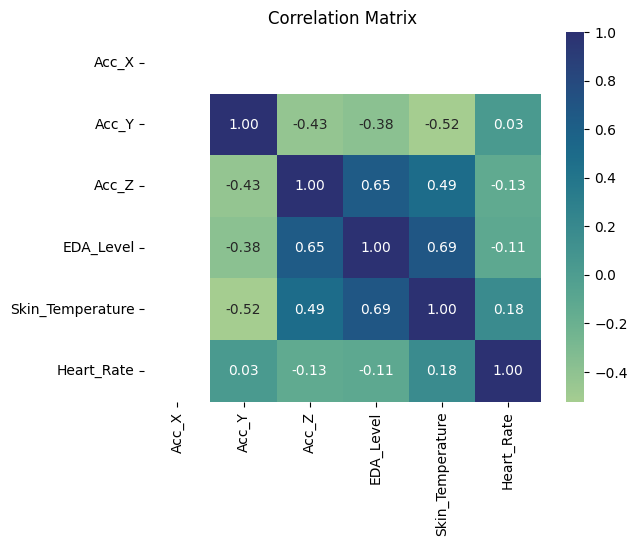

In [43]:
# Calculate the correlation matrix of the selected columns
corr = test_df[['Acc_X', 'Acc_Y', 'Acc_Z', 'EDA_Level', 'Skin_Temperature', 'Heart_Rate']].corr()

# Import the seaborn library for data visualization
import seaborn as sns

# Print the correlation coefficients
print(corr)

# Plot the correlation matrix as a heatmap using seaborn
sns.heatmap(corr, cmap='crest', annot=True, fmt='.2f')
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


           Acc_X     Acc_Y     Acc_Z  EDA_Level
Acc_X        NaN       NaN       NaN        NaN
Acc_Y        NaN  1.000000 -0.433822  -0.380999
Acc_Z        NaN -0.433822  1.000000   0.646473
EDA_Level    NaN -0.380999  0.646473   1.000000


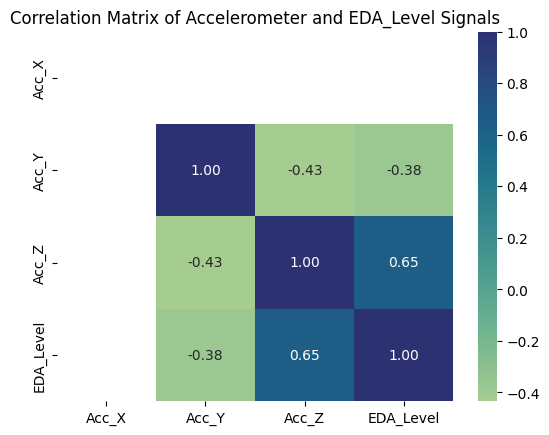

In [44]:
# Define the list of columns to use for correlation analysis
acc_eda = ['Acc_X', 'Acc_Y', 'Acc_Z', 'EDA_Level']

# Compute the correlation coefficients of the selected columns in the test_df dataframe
corr = test_df[acc_eda].corr()

# Print the correlation coefficients
print(corr)

# Plot the correlation matrix as a heatmap using Seaborn library
sns.heatmap(corr, cmap='crest', annot=True, fmt='.2f')

# Set the title of the plot
plt.title('Correlation Matrix of Accelerometer and EDA_Level Signals')

# Display the plot
plt.show()


                  Acc_X     Acc_Y     Acc_Z  Skin_Temperature
Acc_X               NaN       NaN       NaN               NaN
Acc_Y               NaN  1.000000 -0.433822         -0.523097
Acc_Z               NaN -0.433822  1.000000          0.491892
Skin_Temperature    NaN -0.523097  0.491892          1.000000


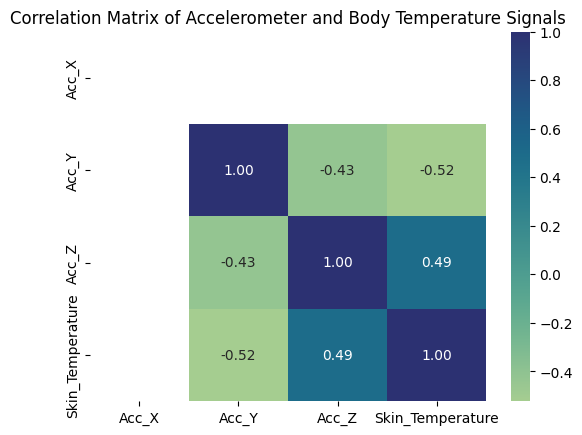

In [45]:
# Define columns of interest
acc_temp = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Skin_Temperature']

# Compute the correlation coefficients between accelerometer and skin temperature data
corr = test_df[acc_temp].corr()

# Print the correlation coefficients
print(corr)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='crest', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Accelerometer and Body Temperature Signals')
plt.show()


            Acc_X     Acc_Y     Acc_Z  Heart_Rate
Acc_X         NaN       NaN       NaN         NaN
Acc_Y         NaN  1.000000 -0.433822    0.030551
Acc_Z         NaN -0.433822  1.000000   -0.130955
Heart_Rate    NaN  0.030551 -0.130955    1.000000


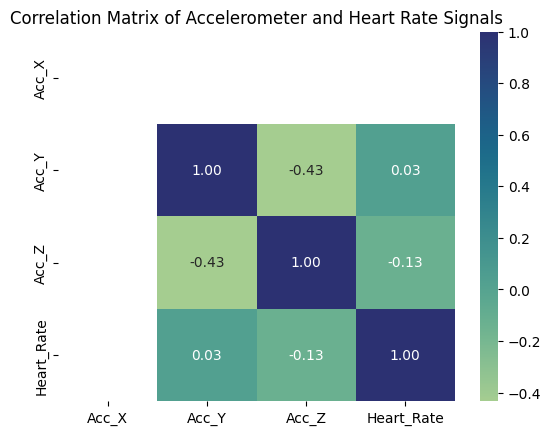

In [46]:
# Compute the correlation coefficients of test dataframe
acc_hr = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Heart_Rate']
corr = test_df[acc_hr].corr()

# Print the correlation coefficients
print(corr)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='crest', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Accelerometer and Heart Rate Signals')
plt.show()

            EDA_Level  Heart_Rate
EDA_Level     1.00000    -0.11473
Heart_Rate   -0.11473     1.00000


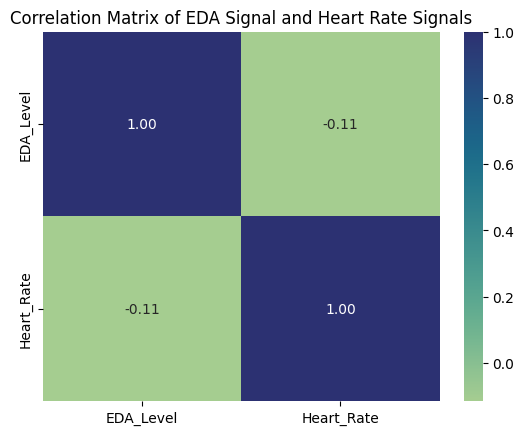

In [47]:
# Compute the correlation coefficients of test dataframe
eda_hr = ['EDA_Level', 'Heart_Rate']
corr = test_df[eda_hr].corr()

# Print the correlation coefficients
print(corr)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='crest', annot=True, fmt='.2f')
plt.title('Correlation Matrix of EDA Signal and Heart Rate Signals')
plt.show()
#-------------------------------------------------------------------------------------------------------------

                  EDA_Level  Skin_Temperature
EDA_Level          1.000000          0.685589
Skin_Temperature   0.685589          1.000000


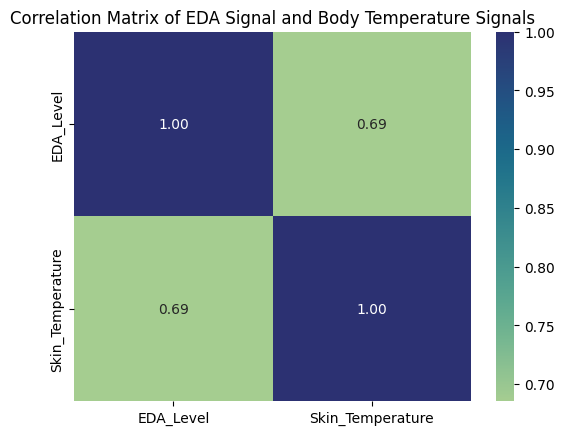

In [48]:
# Compute the correlation coefficients of test dataframe
eda_temp = ['EDA_Level', 'Skin_Temperature']
corr = test_df[eda_temp].corr()

# Print the correlation coefficients
print(corr)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='crest', annot=True, fmt='.2f')
plt.title('Correlation Matrix of EDA Signal and Body Temperature Signals')
plt.show()

                  Skin_Temperature  Heart_Rate
Skin_Temperature          1.000000    0.183037
Heart_Rate                0.183037    1.000000


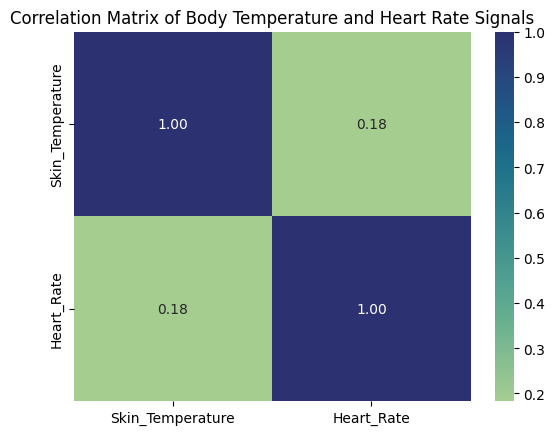

In [49]:
# Compute the correlation coefficients of test dataframe
temp_hr = ['Skin_Temperature', 'Heart_Rate']
corr = test_df[temp_hr].corr()

# Print the correlation coefficients
print(corr)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='crest', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Body Temperature and Heart Rate Signals')
plt.show()

                  Skin_Temperature  Heart_Rate  EDA_Level
Skin_Temperature          1.000000    0.183037   0.685589
Heart_Rate                0.183037    1.000000  -0.114730
EDA_Level                 0.685589   -0.114730   1.000000


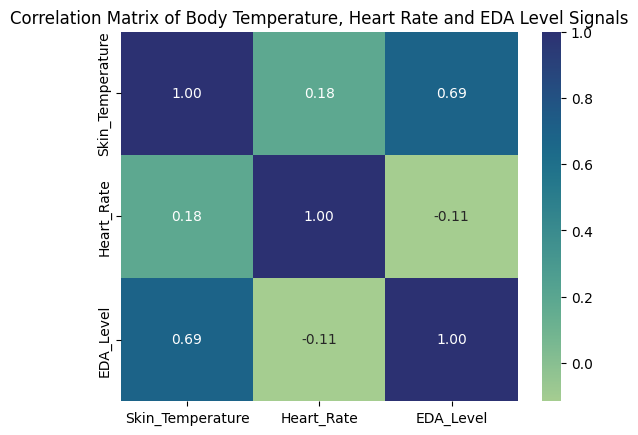

In [50]:
temp_hr = ['Skin_Temperature', 'Heart_Rate', 'EDA_Level']
corr = test_df[temp_hr].corr()

# Print the correlation coefficients
print(corr)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='crest', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Body Temperature, Heart Rate and EDA Level Signals')
plt.show()

In [22]:
# Load the CSV file into a dataframe for basic regression model
df2 = pd.read_csv('cleaned_dataset.csv', dtype={'id': str})
print(df2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2[['Acc_X', 'Acc_Y', 'Acc_Z', 'EDA_Level', 'Skin_Temperature', 'Heart_Rate']], df2['Stress_Level'], test_size=0.7, random_state=40)


# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set and calculate the R-squared score
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(f"R squared score: ",score)

       Unnamed: 0  Acc_X  Acc_Y  Acc_Z  EDA_Level  Heart_Rate  \
0              34   17.0  -23.0    4.0   6.854573       99.72   
1            6780   17.0  -71.0   -1.0   5.569288       80.73   
2           11191   17.0   66.0   21.0   4.105629       94.72   
3           12356   17.0   30.0   55.0   4.172266       86.57   
4           12518   17.0   35.0   57.0   4.295289       85.00   
...           ...    ...    ...    ...        ...         ...   
38937    11501824   17.0   63.0  -12.0   7.204476       93.40   
38938    11501826   17.0   60.0   -2.0   7.306933       93.40   
38939    11501837   17.0   70.0  -37.0   7.291564       93.40   
38940    11504586   17.0   45.0   38.0   5.406783       98.23   
38941    11508871   17.0  -76.0   29.0   3.268244       88.33   

       Skin_Temperature  id                       datetime  Stress_Level  
0                 31.21  15  2020-07-08 14:03:01.062500096           2.0  
1                 31.53  15  2020-07-08 14:06:31.875000064           

In [23]:
print('After plotting and analysing the graphs, it is really hard to tell that which is best candidate but some of the correlation is playing important role while making such decisions')
print('We can use EDA and Heartrate based on analysis of Correlation between them, we also can use the accelerometer data along with heartrate and temprature to predict the stress')

After plotting and analysing the graphs, it is really hard to tell that which is best candidate but some of the correlation is playing important role while making such decisions
We can use EDA and Heartrate based on analysis of Correlation between them, we also can use the accelerometer data along with heartrate and temprature to predict the stress
